In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
M = nx.read_gml("data/polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

### 1.  Create a nice looking graph of the political blog network

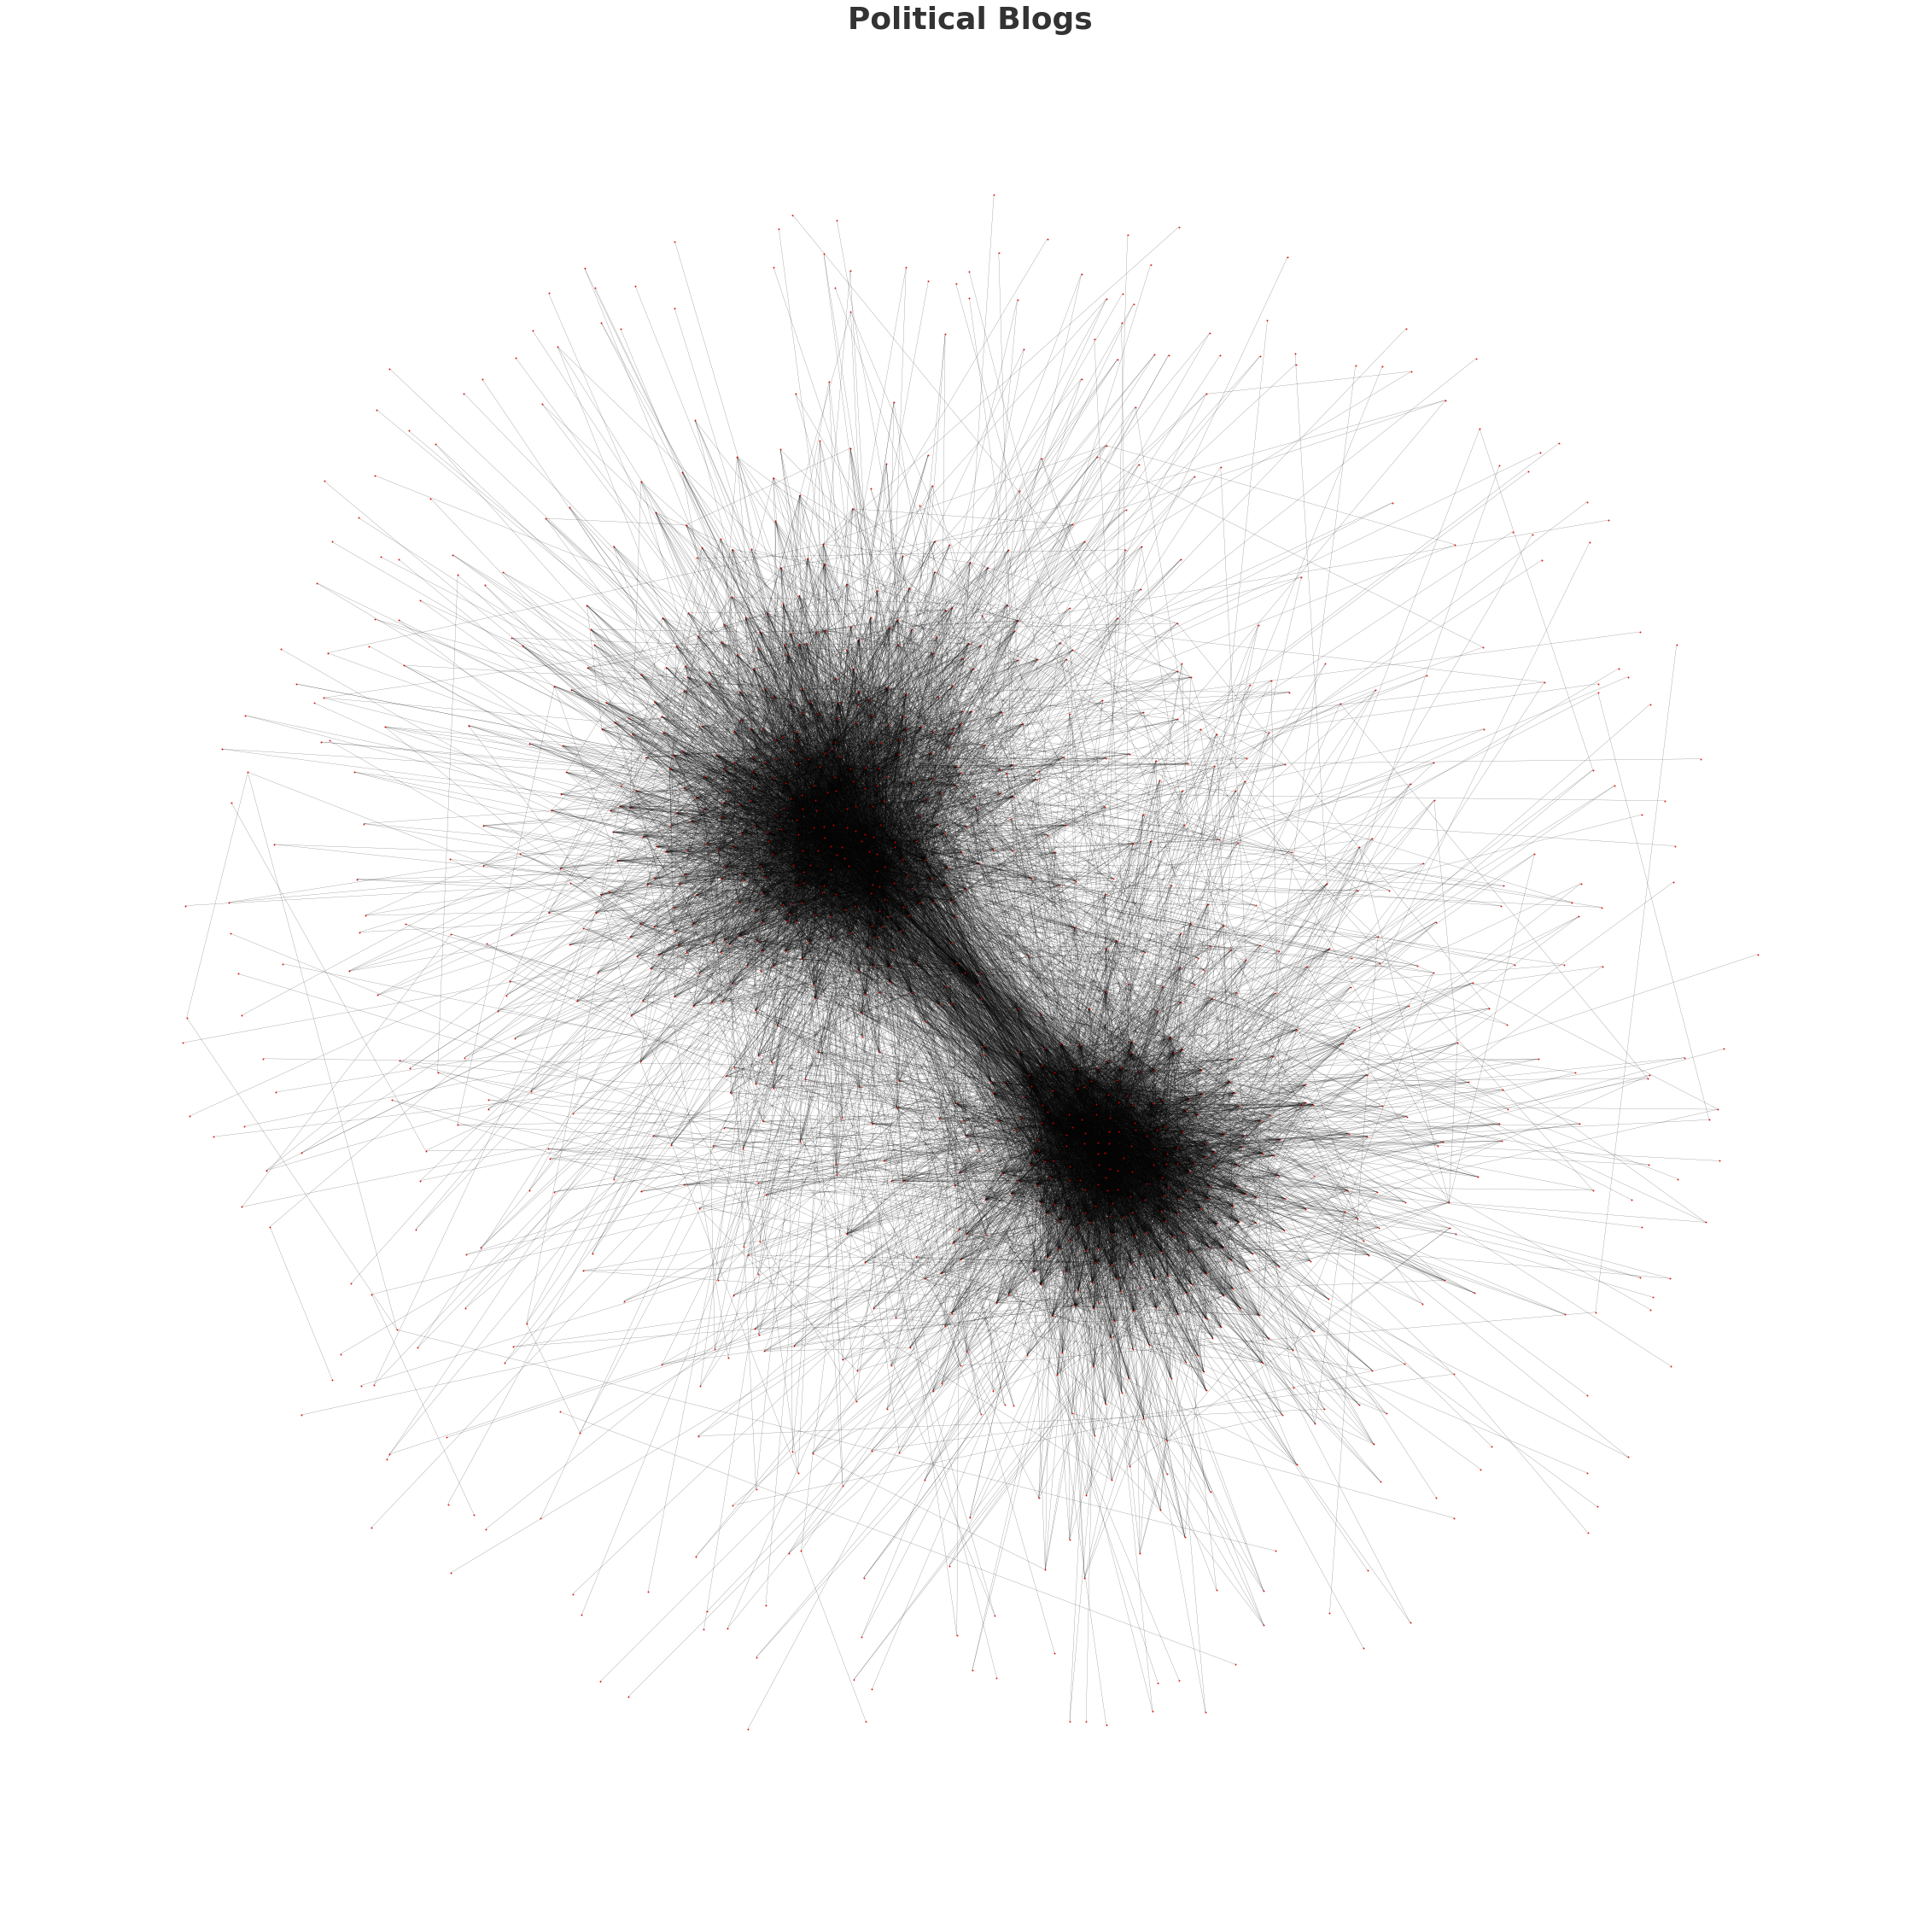

In [4]:
plt.figure(figsize=(40,40))
pos = nx.spring_layout(G, iterations=50, scale=5, k=0.3)
font = {'color'      : '#333333',
        'fontweight' : 'bold',
        'fontsize'   : 36}
plt.title("Political Blogs", font)
# Labels are not really readbale in graphs, so not including them
nx.draw_networkx_nodes(G, pos, node_color='#DE0000', node_size=1, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='#000000', width=0.25, alpha=0.6)
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [5]:
centrality= nx.eigenvector_centrality_numpy(G)
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
sorted_blog_list = sorted(blog_list, key=lambda x: x[1], reverse=True)

In [6]:
sorted_blog_list[:10]

[('atrios.blogspot.com', 0.1948229589885674),
 ('dailykos.com', 0.16090716385818685),
 ('washingtonmonthly.com', 0.14654050463836452),
 ('digbysblog.blogspot.com', 0.14265582251978642),
 ('bodyandsoul.typepad.com', 0.14114853531288882),
 ('liberaloasis.com', 0.1395378566665856),
 ('tbogg.blogspot.com', 0.13704857535546822),
 ('corrente.blogspot.com', 0.12943073134224964),
 ('talkingpointsmemo.com', 0.1270093107829415),
 ('dneiwert.blogspot.com', 0.12238703900637983)]

### 3.  What are the 10 least influential blogs?

In [7]:
sorted_blog_list[-10:]

[('thingsasitis.net', 1.1737028626598267e-05),
 ('massachusetts-liberal.com', 9.48471174661227e-06),
 ('quimundus.squarespace.com', 6.056497487440425e-06),
 ('democratvoice.org', 1.022160231721809e-06),
 ('batr.net', 6.795053204366316e-07),
 ('batr.org/commentary.html', 6.794245454758501e-07),
 ('quimundus.modblog.com', 6.675725345093194e-08),
 ('americanworldview.tripod.com/weltansblog', 7.489792406725769e-09),
 ('digital-democrat.blogspot.com', 1.893757191807032e-18),
 ('thelonedem.com', -1.0878718156961722e-18)]

### 4.  Answer this question for both left wing and right wing blogs seperately.

In [8]:
# Create a dataframe of blogs and co-ordinates
blogs = []
points = []
for blog, point in pos.items():
    blogs.append(blog)
    points.append((point[0], point[1]))

df = pd.DataFrame(points, index=blogs, columns=['x', 'y'])

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [10]:
# Find 2 clusters
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [11]:
df['label'] = kmeans_model.labels_

In [12]:
# After checking the blog content I figured, label 0 is left and 1 is right

In [13]:
left_domains = set(df[df.label == 0].index)
right_domains = set(df[df.label == 1].index)

In [14]:
def print_top_blogs(sorted_blog_list, in_set, asc_order=True, n=10):
    if not asc_order:
        sorted_blog_list = sorted_blog_list[::-1]

    for blog in sorted_blog_list:
        if n <= 0:
            break
        if blog[0] in in_set:
            print(blog)
            n -= 1

In [15]:
# 10 most influtential left blogs
print('10 most influtential left wing blogs:')
print_top_blogs(sorted_blog_list, left_domains)

10 most influtential left wing blogs:
('atrios.blogspot.com', 0.1948229589885674)
('dailykos.com', 0.16090716385818685)
('washingtonmonthly.com', 0.14654050463836452)
('digbysblog.blogspot.com', 0.14265582251978642)
('bodyandsoul.typepad.com', 0.14114853531288882)
('liberaloasis.com', 0.1395378566665856)
('tbogg.blogspot.com', 0.13704857535546822)
('corrente.blogspot.com', 0.12943073134224964)
('talkingpointsmemo.com', 0.1270093107829415)
('dneiwert.blogspot.com', 0.12238703900637983)


In [16]:
# 10 least influtential left blogs
print('10 least influtential left wing blogs:')
print_top_blogs(sorted_blog_list, left_domains, False)

10 least influtential left wing blogs:
('thelonedem.com', -1.0878718156961722e-18)
('digital-democrat.blogspot.com', 1.893757191807032e-18)
('americanworldview.tripod.com/weltansblog', 7.489792406725769e-09)
('quimundus.modblog.com', 6.675725345093194e-08)
('quimundus.squarespace.com', 6.056497487440425e-06)
('massachusetts-liberal.com', 9.48471174661227e-06)
('loveamericahatebush.com', 2.0343745233534705e-05)
('imprescindibile.ilcannocchiale.it', 2.389139248379415e-05)
('eltcamerica.blogspot.com', 2.8363398418917635e-05)
('depressedlonelybored.typepad.com', 3.0375262145979664e-05)


In [17]:
# 10 most influtential right blogs
print('10 most influtential right wing blogs:')
print_top_blogs(sorted_blog_list, right_domains)

10 most influtential right wing blogs:
('instapundit.com', 0.1053894203375427)
('vodkapundit.com', 0.0587314774714965)
('hughhewitt.com', 0.058500202441585214)
('powerlineblog.com', 0.05546657846251212)
('michellemalkin.com', 0.052132970479090664)
('blogsforbush.com', 0.051995488843828375)
('outsidethebeltway.com', 0.05128868653981525)
('balloon-juice.com', 0.04951260893906009)
('wizbangblog.com', 0.04906970371213925)
('volokh.com', 0.0489998072001309)


In [18]:
# 10 least influtential right blogs
print('10 least influtential right wing blogs:')
print_top_blogs(sorted_blog_list, right_domains, False)

10 least influtential right wing blogs:
('batr.org/commentary.html', 6.794245454758501e-07)
('batr.net', 6.795053204366316e-07)
('democratvoice.org', 1.022160231721809e-06)
('thingsasitis.net', 1.1737028626598267e-05)
('usademocrazy.blogspot.com', 2.9848773562856118e-05)
('margieburns.com', 3.3203027267693475e-05)
('endthenightmare.blogspot.com', 3.58873374688836e-05)
('winnegar.blog-city.com', 3.6217820642317415e-05)
('democratreport.blogspot.com', 3.6217820642317714e-05)
('amliberal.com/blog', 3.6217820642318994e-05)
